## Loading Libraries

In [280]:
import pandas as pd
from scipy.io import arff
import numpy as np
from sklearn.preprocessing import FunctionTransformer, StandardScaler

#Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading Data


In [206]:
df = pd.read_csv('../../data/miami2016.csv')

##### Initial Data Review

<hr>

### Descriptive Statistics

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         13932 non-null  int64  
 1   LATITUDE           13932 non-null  float64
 2   LONGITUDE          13932 non-null  float64
 3   PARCELNO           13932 non-null  float64
 4   SALE_PRC           13932 non-null  float64
 5   LND_SQFOOT         13932 non-null  float64
 6   TOT_LVG_AREA       13932 non-null  float64
 7   SPEC_FEAT_VAL      13932 non-null  float64
 8   RAIL_DIST          13909 non-null  float64
 9   OCEAN_DIST         13932 non-null  float64
 10  WATER_DIST         13932 non-null  float64
 11  CNTR_DIST          13932 non-null  float64
 12  SUBCNTR_DI         13932 non-null  float64
 13  HWY_DIST           13932 non-null  float64
 14  age                13932 non-null  float64
 15  avno60plus         13932 non-null  float64
 16  month_sold         139

In [208]:
df.describe()

Unnamed: 0      LATITUDE     LONGITUDE      PARCELNO      SALE_PRC  \
count  13932.00000  13932.000000  13932.000000  1.393200e+04  1.393200e+04   
mean    6965.50000     25.728811    -80.327475  2.356496e+12  3.999419e+05   
std     4021.96631      0.140633      0.089199  1.199290e+12  3.172147e+05   
min        0.00000     25.434333    -80.542172  1.020008e+11  7.200000e+04   
25%     3482.75000     25.620056    -80.403278  1.079160e+12  2.350000e+05   
50%     6965.50000     25.731810    -80.338911  3.040300e+12  3.100000e+05   
75%    10448.25000     25.852269    -80.258019  3.060170e+12  4.280000e+05   
max    13931.00000     25.974382    -80.119746  3.660170e+12  2.650000e+06   

         LND_SQFOOT  TOT_LVG_AREA  SPEC_FEAT_VAL     RAIL_DIST    OCEAN_DIST  \
count  13932.000000  13932.000000   13932.000000  13909.000000  13932.000000   
mean    8620.879917   2058.044574    9562.493468   8351.306507  31690.993798   
std     6070.088742    813.538535   13890.967782   6182.537689  17595.079468   
min     1248.000000    854.000000       0.000000     10.500000    236.100000   
25%     5400.000000   1470.000000     810.000000   3291.900000  18079.350000   
50%     7500.000000   1877.500000    2765.500000   7116.900000  28541.750000   
75%     9126.250000   2471.000000   12352.250000  12110.200000  44310.650000   
max    57064.000000   6287.000000  175020.000000  29621.500000  75744.900000   

         WATER_DIST      CNTR_DIST     SUBCNTR_DI      HWY_DIST           age  \
count  13932.000000   13932.000000   13932.000000  13932.000000  13932.000000   
mean   11960.285235   68490.327132   41115.047265   7723.770693     30.669251   
std    11932.992369   32008.474808   22161.825935   6068.936108     21.153068   
min        0.000000    3825.600000    1462.800000     90.200000      0.000000   
25%     2675.850000   42823.100000   23996.250000   2998.125000     14.000000   
50%     6922.600000   65852.400000   41109.900000   6159.750000     26.000000   
75%    19200.000000   89358.325000   53949.375000  10854.200000     46.000000   
max    50399.800000  159976.500000  110553.800000  48167.300000     96.000000   

         avno60plus    month_sold  structure_quality  
count  13932.000000  13932.000000       13932.000000  
mean       0.014930      6.655828           3.513997  
std        0.121276      3.301523           1.097444  
min        0.000000      1.000000           1.000000  
25%        0.000000      4.000000           2.000000  
50%        0.000000      7.000000           4.000000  
75%        0.000000      9.000000           4.000000  
max        1.000000     12.000000           5.000000

In [209]:
df.shape

(13932, 18)

---

## Data Description

- PARCELNO: unique identifier for each property. About 1% appear multiple times.
- SALE_PRC: sale price ($)
- LND_SQFOOT: land area (square feet) 
- TOT_LVG_AREA: floor area (square feet) 
- SPEC_FEAT_VAL: value of special features (e.g., swimming pools) ($)
- RAIL_DIST: distance to the nearest rail line (an indicator of noise) (feet)
- OCEAN_DIST: distance to the ocean (feet) 
- WATER_DIST: distance to the nearest body of water (feet) 
- CNTR_DIST: distance to the Miami central business district (feet)
- SUBCNTR_DI: distance to the nearest subcenter (feet)
- HWY_DIST: distance to the nearest highway (an indicator of noise) (feet) 
- age: age of the structure
- avno60plus: dummy variable for airplane noise exceeding an acceptable level 
- structure_quality: quality of the structure 
- month_sold: sale month in 2016 (1 = jan)
- LATITUDE
- LONGITUDE

---

In [210]:
df

Unnamed: 0   LATITUDE  LONGITUDE      PARCELNO  SALE_PRC  LND_SQFOOT  \
0               0  25.891031 -80.160561  6.222801e+11  440000.0      9375.0   
1               1  25.891324 -80.153968  6.222801e+11  349000.0      9375.0   
2               2  25.891334 -80.153740  6.222801e+11  800000.0      9375.0   
3               3  25.891765 -80.152657  6.222801e+11  988000.0     12450.0   
4               4  25.891825 -80.154639  6.222801e+11  755000.0     12800.0   
...           ...        ...        ...           ...       ...         ...   
13927       13927  25.783130 -80.259795  1.313200e+11  275000.0      6780.0   
13928       13928  25.783585 -80.260354  1.313200e+11  340000.0      7500.0   
13929       13929  25.783793 -80.256126  1.313200e+11  287500.0      8460.0   
13930       13930  25.784007 -80.257542  1.313200e+11  315000.0      7500.0   
13931       13931  25.784387 -80.258901  1.313200e+11  250000.0      8833.0   

       TOT_LVG_AREA  SPEC_FEAT_VAL  RAIL_DIST  OCEAN_DIST  WATER_DIST  \
0            1753.0            0.0     2815.9     12811.4       347.6   
1            1715.0            0.0     4359.1     10648.4       337.8   
2            2276.0        49206.0     4412.9     10574.1       297.1   
3            2058.0        10033.0     4585.0     10156.5         0.0   
4            1684.0        16681.0     4063.4     10836.8       326.6   
...             ...            ...        ...         ...         ...   
13927         967.0         6580.0     3844.5     20568.0      3252.4   
13928        1854.0         2544.0     3593.6     20791.9      3077.7   
13929        1271.0         2064.0     4143.2     20307.9      3588.4   
13930        1613.0         3136.0     3986.9     20542.6      3589.1   
13931        1867.0          266.0     3793.9     20859.6      3421.0   

       CNTR_DIST  SUBCNTR_DI  HWY_DIST   age  avno60plus  month_sold  \
0        42815.3     37742.2   15954.9  67.0         0.0         8.0   
1        43504.9     37340.5   18125.0  63.0         0.0         9.0   
2        43530.4     37328.7   18200.5  61.0         0.0         2.0   
3        43797.5     37423.2   18514.4  63.0         0.0         9.0   
4        43599.7     37550.8   17903.4  42.0         0.0         7.0   
...          ...         ...       ...   ...         ...         ...   
13927    22175.9     12150.1     917.4  16.0         0.0         4.0   
13928    22375.1     12316.8     738.2  26.0         0.0         5.0   
13929    20966.9     12433.0     743.7  16.0         0.0         7.0   
13930    21475.6     12458.0     626.1  16.0         0.0         8.0   
13931    21928.6     12599.0     474.7  62.0         0.0        11.0   

       structure_quality  
0                    4.0  
1                    4.0  
2                    4.0  
3                    4.0  
4                    4.0  
...                  ...  
13927                4.0  
13928                4.0  
13929                4.0  
13930                4.0  
13931                4.0  

[13932 rows x 18 columns]

## IDR


In [211]:
df.columns

Index(['Unnamed: 0', 'LATITUDE', 'LONGITUDE', 'PARCELNO', 'SALE_PRC',
       'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST',
       'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST',
       'age', 'avno60plus', 'month_sold', 'structure_quality'],
      dtype='object')

In [212]:
df.drop(columns=['Unnamed: 0'],inplace=True)

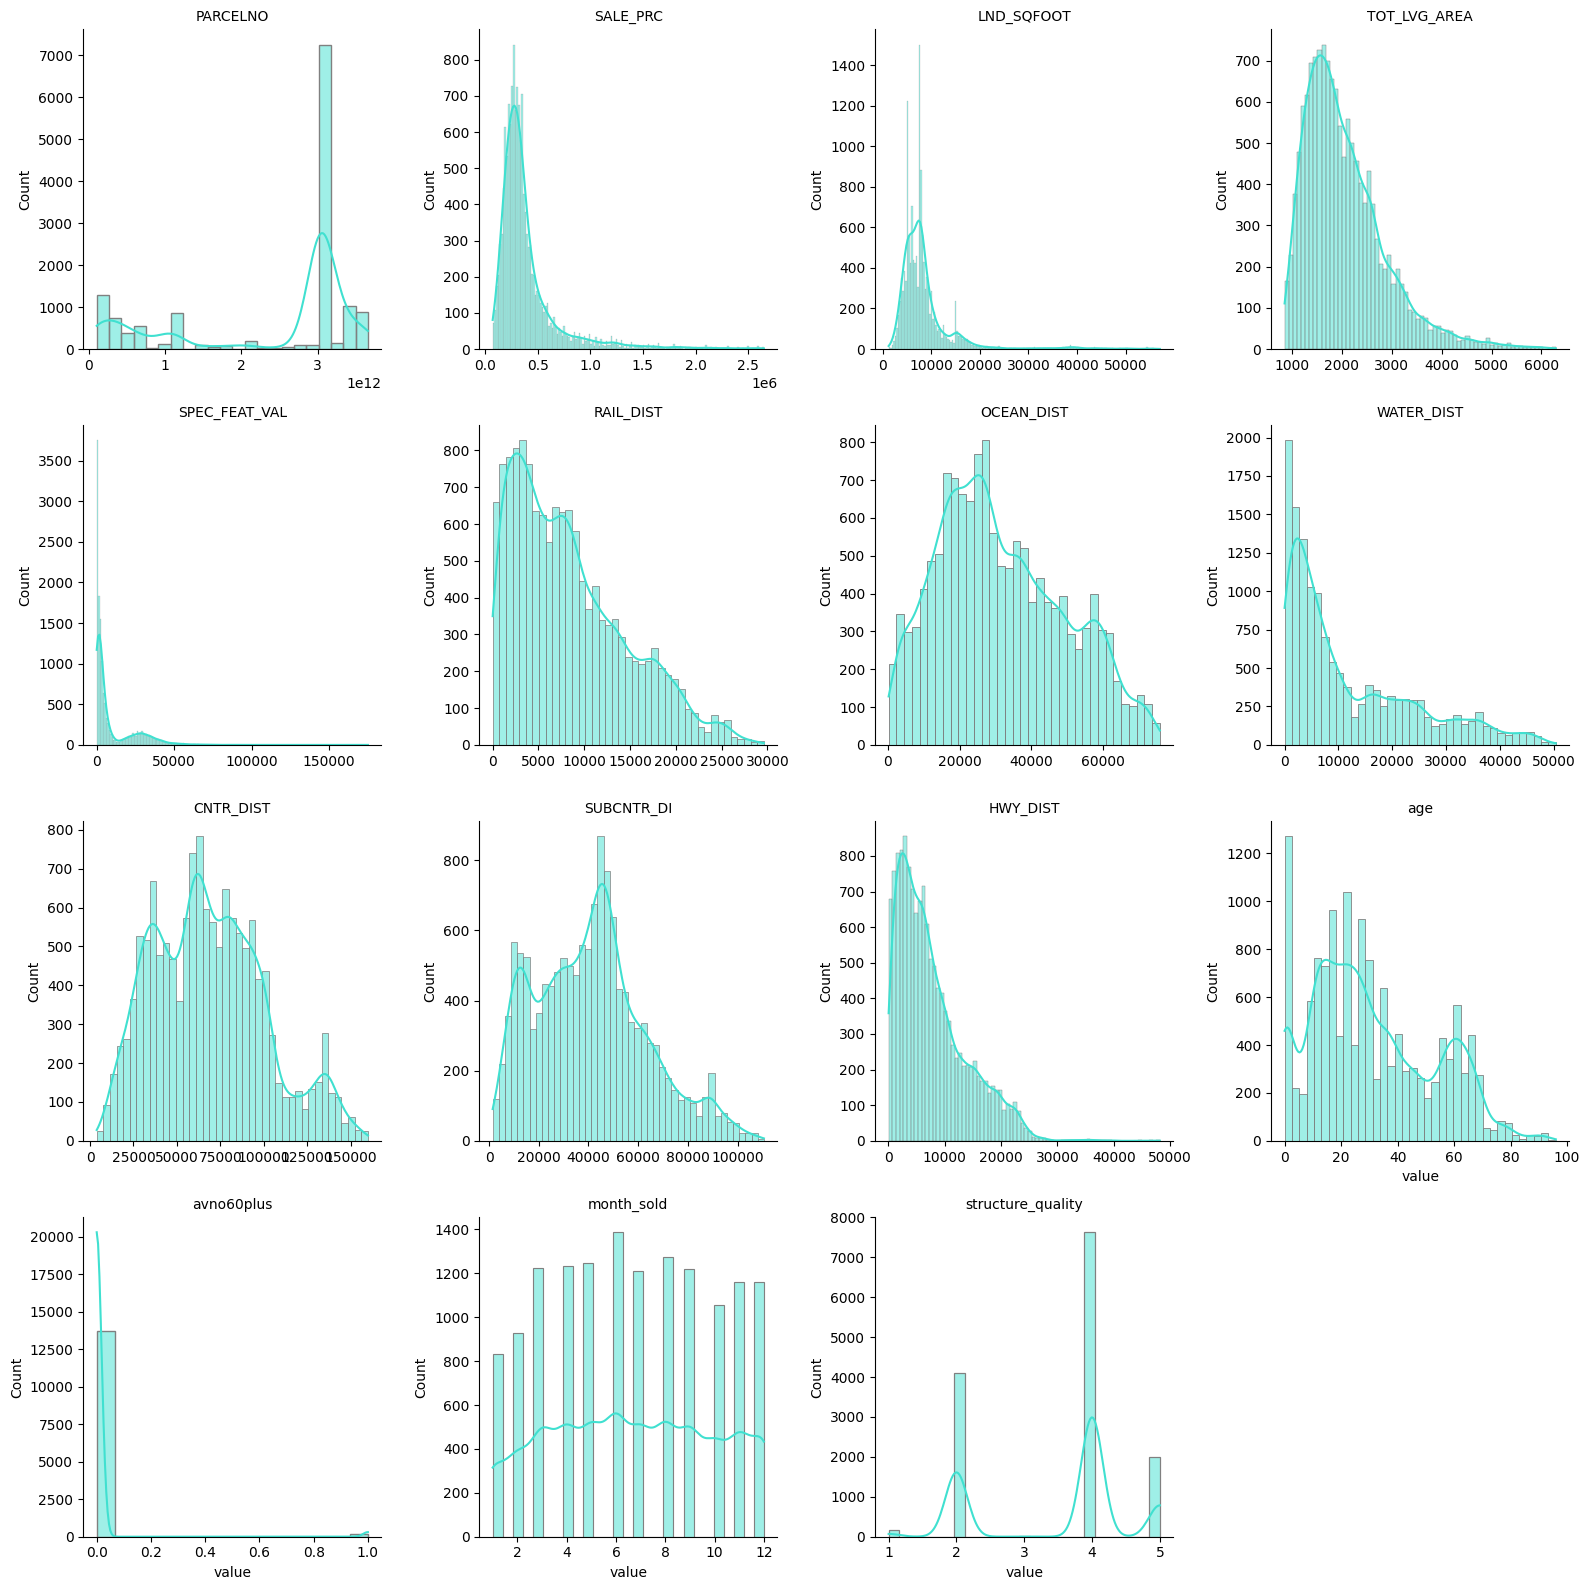

In [213]:
df_melt = df.drop(columns=['LATITUDE','LONGITUDE']).melt()
g = sns.FacetGrid(df_melt, col="variable", col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "value", color="turquoise",kde=True,edgecolor="grey")
g.set_titles("{col_name}")
plt.show()

#### Key Notes of Initial Data Review
- ParcelNo shows some sort of indexing system but should show no form of analysis capabilities.
- Columns such as Sales Price, Land Size (Square Foot),Total Living Area, Special Feature Value appears to be left skewed (Note to be normalised or standardised)
- Columns such av60noplus, month_sold, structure_quality are categorical of nature (Note to convert into categorical values, check if ordinal or nominal)

In [214]:
df.isna().sum()

LATITUDE              0
LONGITUDE             0
PARCELNO              0
SALE_PRC              0
LND_SQFOOT            0
TOT_LVG_AREA          0
SPEC_FEAT_VAL         0
RAIL_DIST            23
OCEAN_DIST            0
WATER_DIST            0
CNTR_DIST             0
SUBCNTR_DI            0
HWY_DIST              0
age                   0
avno60plus            0
month_sold            0
structure_quality     0
dtype: int64

23 missing values on Highway Distance

## EDA | Exploratory Data Analysis

In [215]:
df_melt = df.melt(id_vars='SALE_PRC')

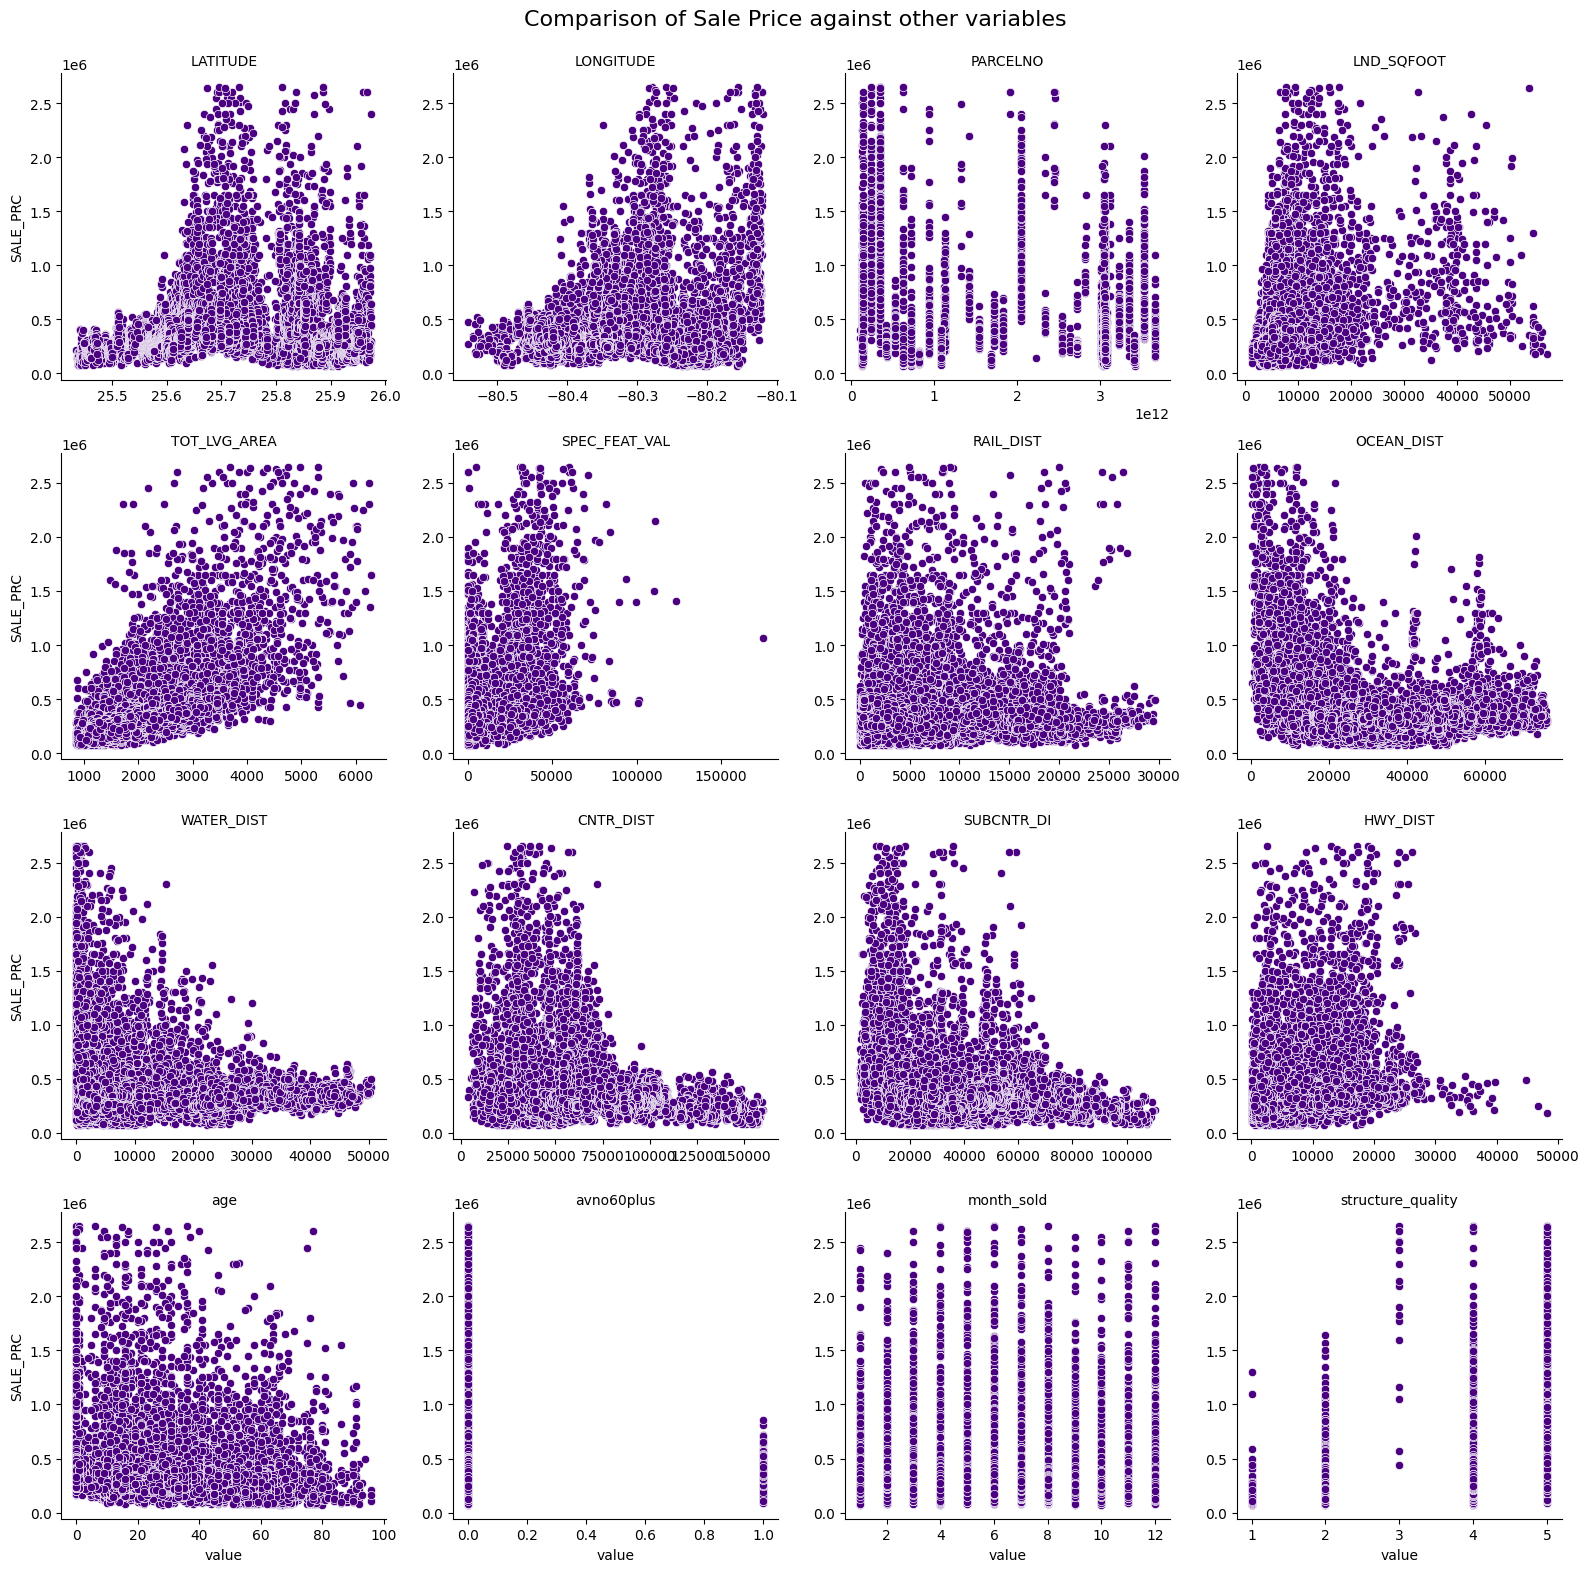

In [216]:
g = sns.FacetGrid(df_melt, col="variable", col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.scatterplot,"value","SALE_PRC", color="indigo")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.94) 
g.figure.suptitle("Comparison of Sale Price against other variables", fontsize=16)
plt.show()

### Key Notes
- Longitude and Latitude seems to have a somewhat linear relationship with Sale Price
- ParcelNo shows no form of a proper relationship with Sale Price
- Land Size and Living Area show a positive linear relationship with Sale Price
- Special Feature Value has outliers but show a steep linear relationship
- Rail, Ocean, Water, Business Central, SubCenter, Highway distance and Age show a reciprocal graph, indicating diminishing prices as the property gets further from said variables or older.
- avno60plus, month sold and structure quality are categorical variables (Ordinal and Nominal) and should be converted as such.
- No relationship in month sold.
- STructure quality indicates 3 and above have prices over 2 million while those with airplane sounds dont break the 1 million barrier.

In [217]:
df.columns

Index(['LATITUDE', 'LONGITUDE', 'PARCELNO', 'SALE_PRC', 'LND_SQFOOT',
       'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST',
       'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age',
       'avno60plus', 'month_sold', 'structure_quality'],
      dtype='object')

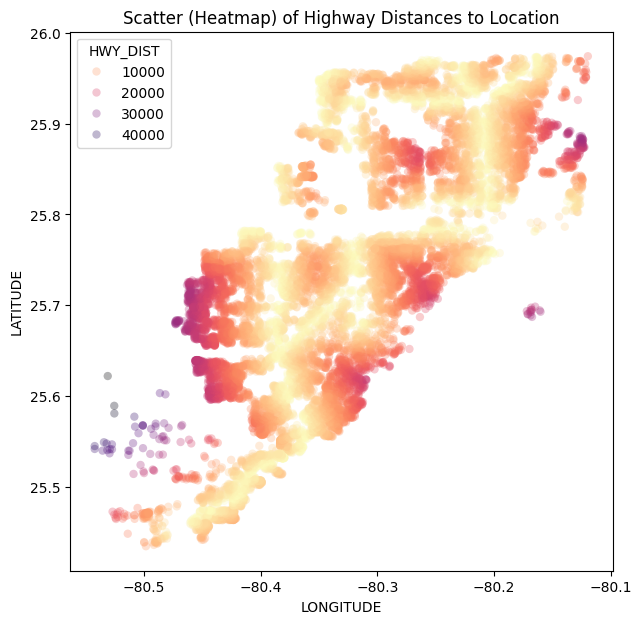

In [218]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x='LONGITUDE', y='LATITUDE', 
                          hue='HWY_DIST',
                          palette='magma_r',
                          alpha=0.3,edgecolors='none')
plt.title('Scatter (Heatmap) of Highway Distances to Location')
plt.show()


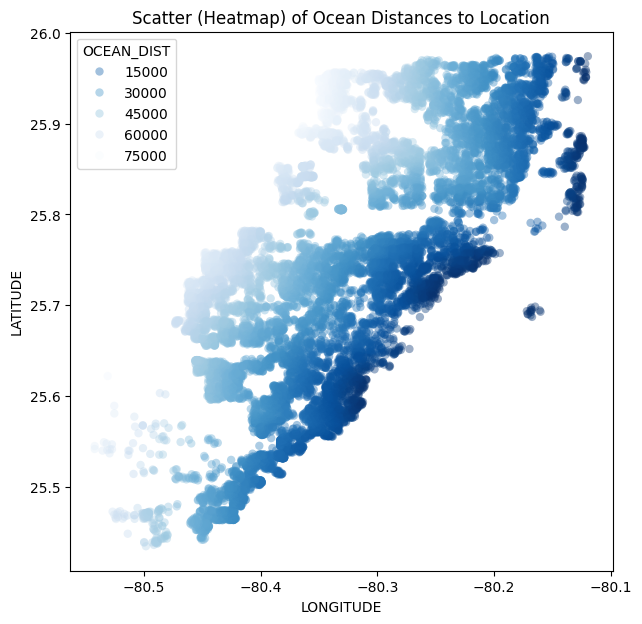

In [219]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x='LONGITUDE', y='LATITUDE', 
                          hue='OCEAN_DIST',
                          palette='Blues_r',
                          alpha=0.4,edgecolors='none')
plt.title('Scatter (Heatmap) of Ocean Distances to Location')
plt.show()


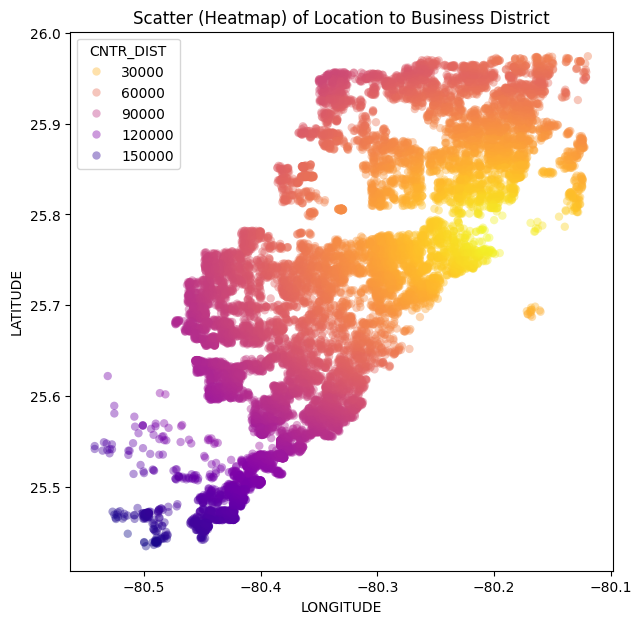

In [220]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x='LONGITUDE', y='LATITUDE', 
                          hue='CNTR_DIST',
                          palette='plasma_r',
                          alpha=0.4,edgecolors='none')
plt.title('Scatter (Heatmap) of Location to Business District')
plt.show()
 

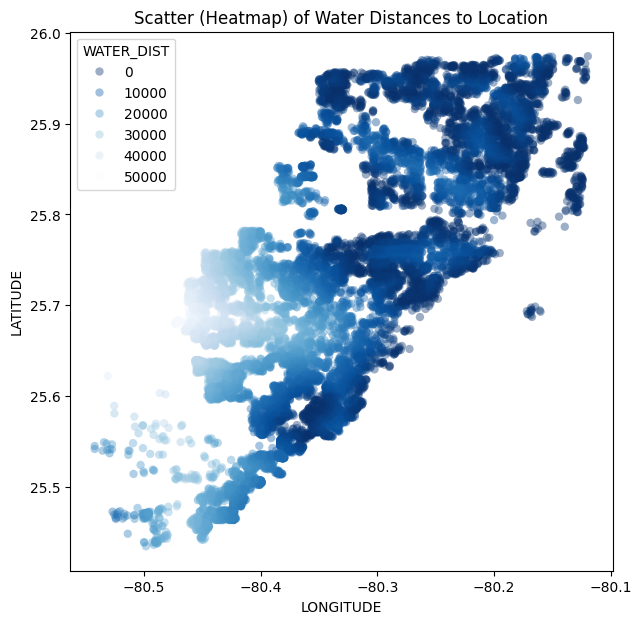

In [221]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x='LONGITUDE', y='LATITUDE', 
                          hue='WATER_DIST',
                          palette='Blues_r',
                          alpha=0.4,edgecolors='none')
plt.title('Scatter (Heatmap) of Water Distances to Location')
plt.show()
 

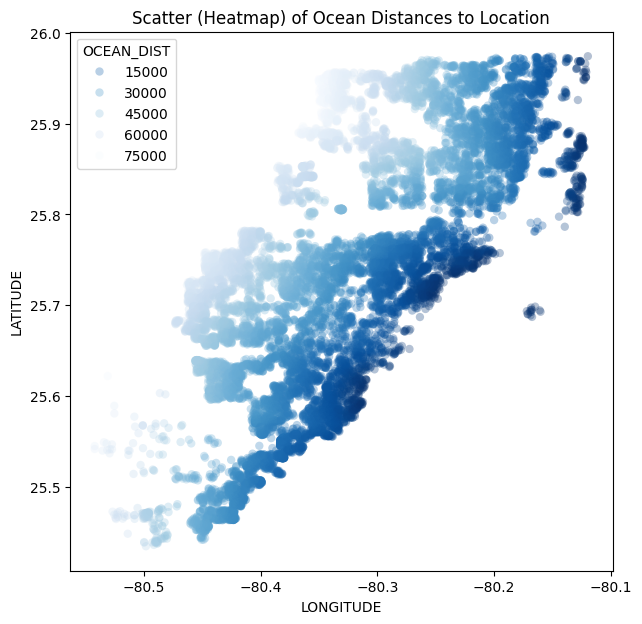

In [222]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x='LONGITUDE', y='LATITUDE', 
                          hue='OCEAN_DIST',
                          palette='Blues_r',
                          alpha=0.3,edgecolors='none')
plt.title('Scatter (Heatmap) of Ocean Distances to Location')
plt.show()


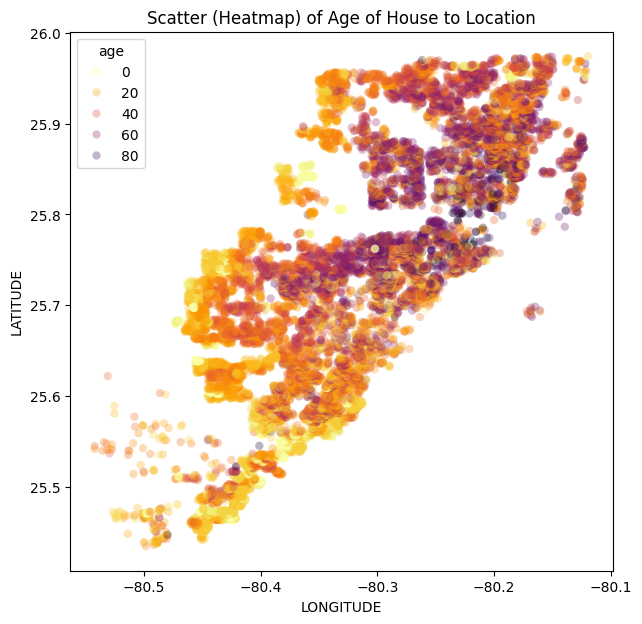

In [223]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x='LONGITUDE', y='LATITUDE', 
                          hue='age',
                          palette='inferno_r',
                          alpha=0.3,edgecolors='none')
plt.title('Scatter (Heatmap) of Age of House to Location')
plt.show()


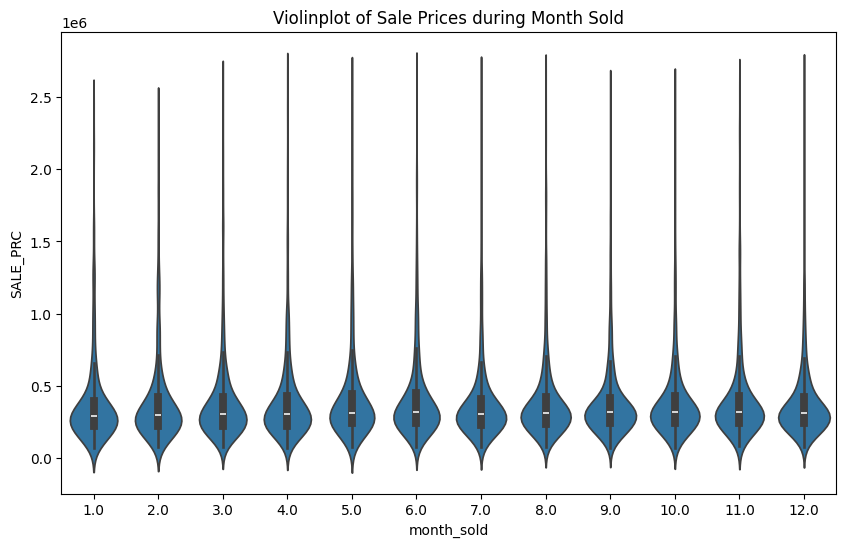

In [224]:
plt.figure(figsize=(10,6))
sns.violinplot(y=df['SALE_PRC'],x=df['month_sold'])
plt.title('Violinplot of Sale Prices during Month Sold')
plt.show()

C:\Users\Marcus Ong\AppData\Local\Temp\ipykernel_19864\2465117842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['age'],x=df['structure_quality'],palette="muted")


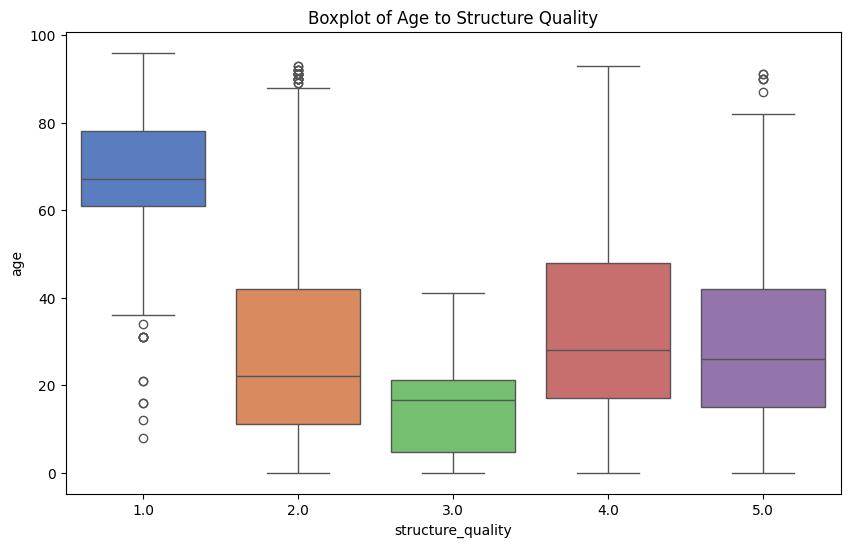

In [225]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df['age'],x=df['structure_quality'],palette="muted")
plt.title('Boxplot of Age to Structure Quality')
plt.show()

## Data Preprocessing

### Feature Cleaning

<Axes: >

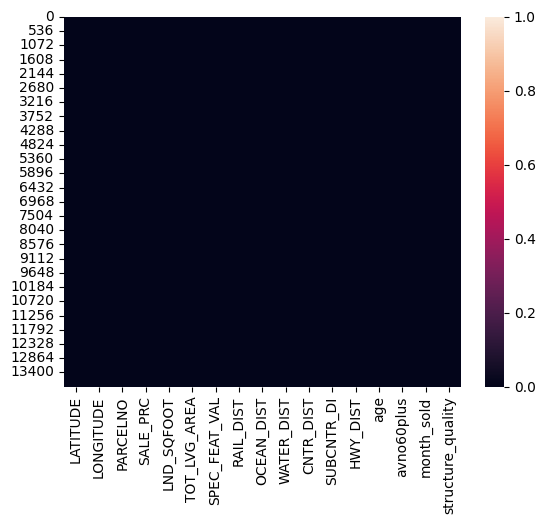

In [226]:
sns.heatmap(df.isna())

In [227]:
df.isna().sum()

LATITUDE              0
LONGITUDE             0
PARCELNO              0
SALE_PRC              0
LND_SQFOOT            0
TOT_LVG_AREA          0
SPEC_FEAT_VAL         0
RAIL_DIST            23
OCEAN_DIST            0
WATER_DIST            0
CNTR_DIST             0
SUBCNTR_DI            0
HWY_DIST              0
age                   0
avno60plus            0
month_sold            0
structure_quality     0
dtype: int64

In [228]:
## CHECK PREVIOUS CITATIONS 5011CEM 
for column in df.columns[df.isna().any()]:
    skew = df[column].skew()
    if skew <= 2 and skew >= -2 :
        print(f'{column} skewness : {df[column].skew():.2f} : Mean')
    else:
        print(f'{column} skewness : {df[column].skew():.2f} : Median')

RAIL_DIST skewness : 0.82 : Mean


In [229]:
df['RAIL_DIST'].fillna(df['RAIL_DIST'].mean(),inplace=True)

C:\Users\Marcus Ong\AppData\Local\Temp\ipykernel_19864\1288485148.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RAIL_DIST'].fillna(df['RAIL_DIST'].mean(),inplace=True)


In [230]:
df.isna().sum()

LATITUDE             0
LONGITUDE            0
PARCELNO             0
SALE_PRC             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
RAIL_DIST            0
OCEAN_DIST           0
WATER_DIST           0
CNTR_DIST            0
SUBCNTR_DI           0
HWY_DIST             0
age                  0
avno60plus           0
month_sold           0
structure_quality    0
dtype: int64

### Feature Engineering

- Get Seasons from month sold
- price per sqft
- land utilization lndqft/lvgare
- Proximity variable from ocean and water within a km
- fix the skewness

In [231]:
df['PRICEPERLNDSQFT'] = df['SALE_PRC'] / df['LND_SQFOOT']
df['PRICEPERTOTLVGAREA'] = df['SALE_PRC'] / df['TOT_LVG_AREA']

In [232]:
df['LAND_UTIL'] = df['TOT_LVG_AREA'] / df['LND_SQFOOT'] * 100

In [233]:
df['WALK_OCEAN'] = df['OCEAN_DIST'].apply(lambda x: 1 if x <= 1000 else 0) 

In [234]:
df['AVG_DIST'] = df[['RAIL_DIST', 'OCEAN_DIST',
       'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST']].mean(axis=1)

#### Fix Categorical Variables

In [235]:
df[['structure_quality','month_sold','avno60plus']] = df[['structure_quality','month_sold','avno60plus']].astype(int)

### Fix Skew

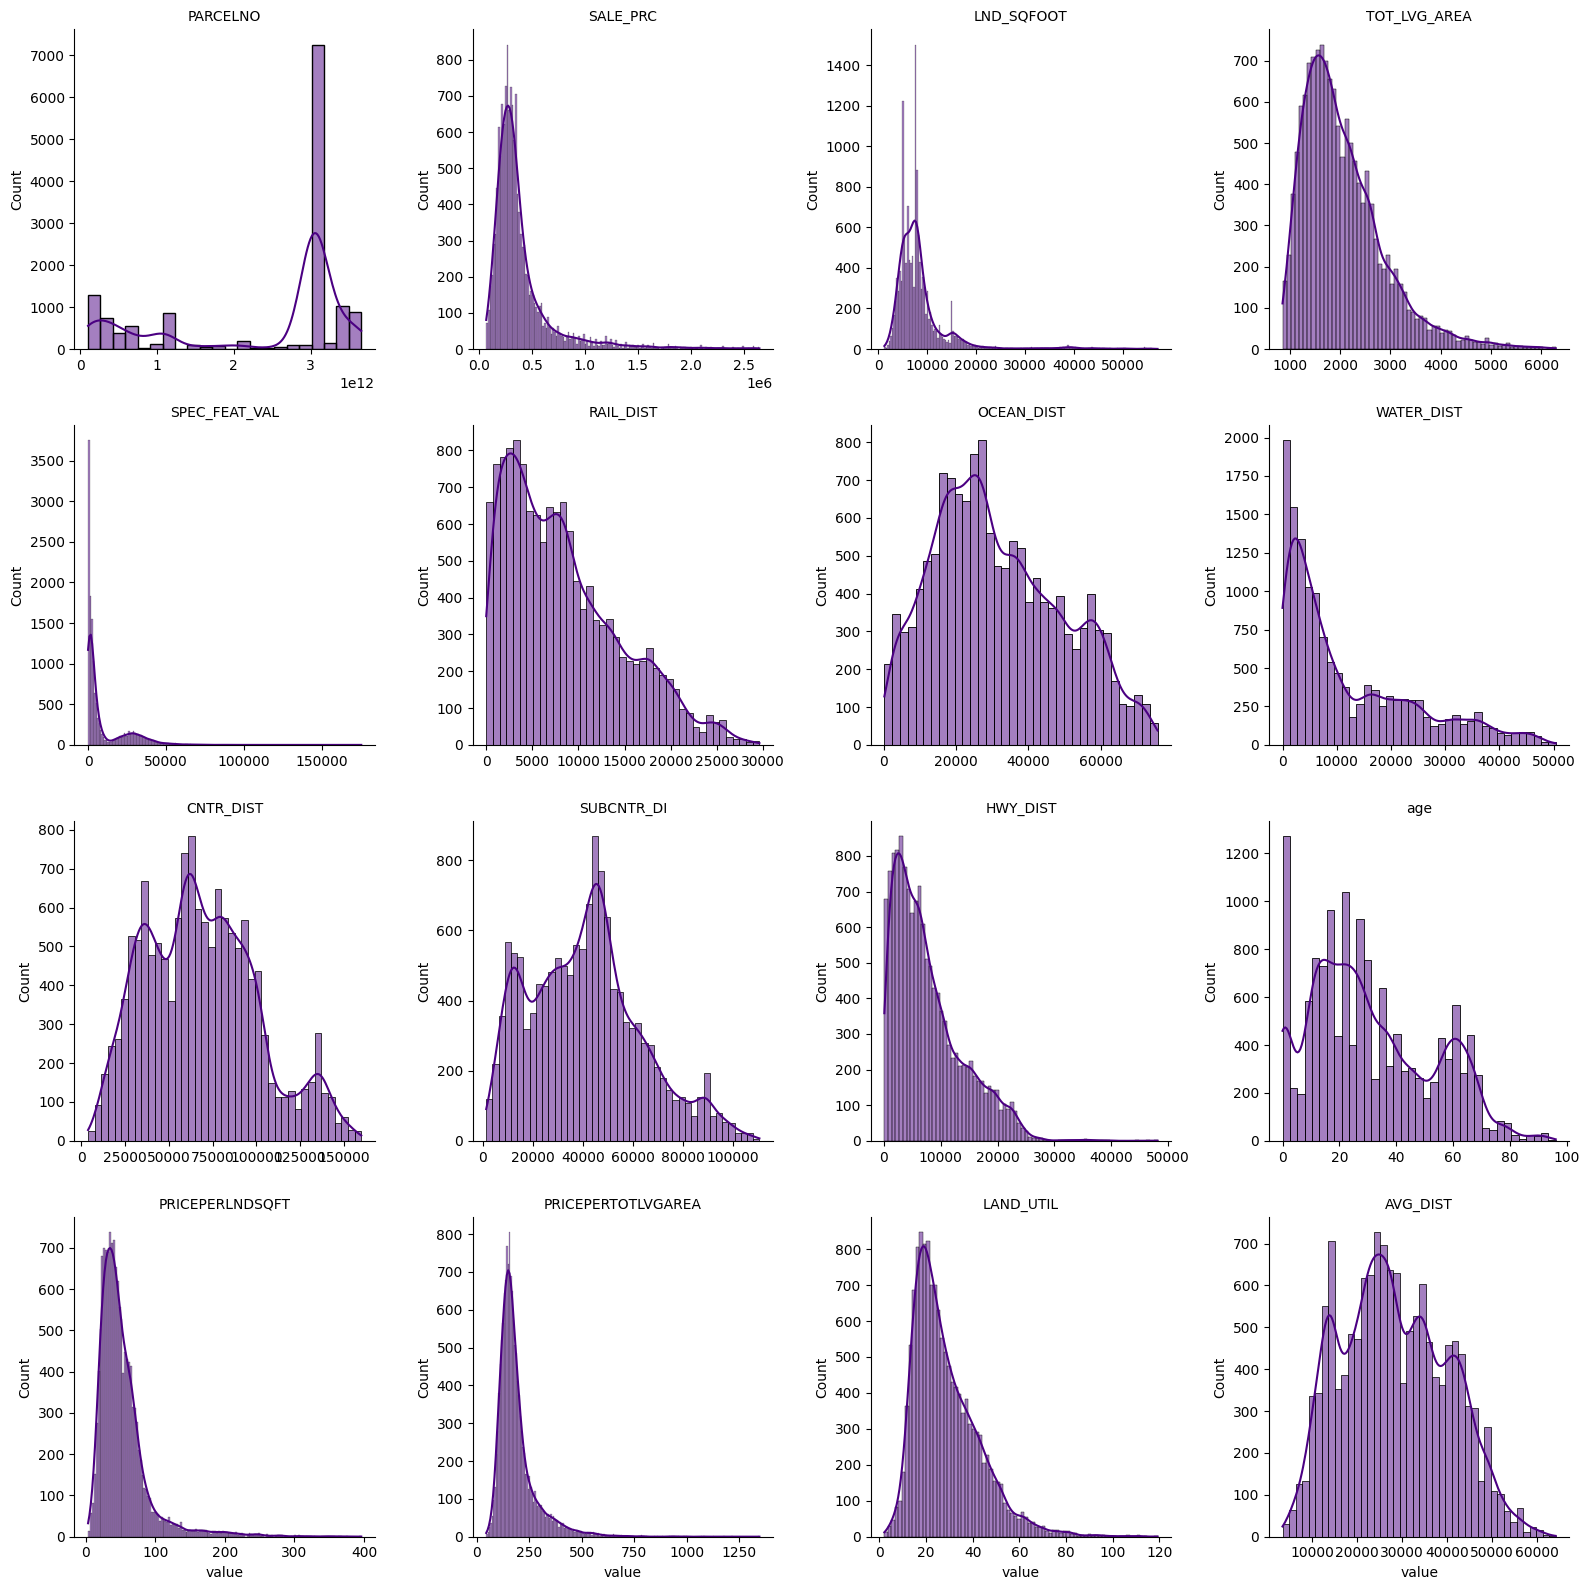

In [236]:
# Recheck for Skew on new Variables
df_melt = df.drop(columns=['LATITUDE','LONGITUDE','WALK_OCEAN','structure_quality','month_sold','avno60plus']).melt()
g = sns.FacetGrid(df_melt, col="variable", col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "value", color="indigo",kde=True,)
g.set_titles("{col_name}")
plt.show()

In [237]:
df_cont =  df.drop(columns=['SALE_PRC','LATITUDE', 'LONGITUDE', 'WALK_OCEAN', 'structure_quality', 'month_sold', 'avno60plus'])
for column in df_cont.columns:
   print(f'{column} skewness : {df_cont[column].skew():.2f}')

PARCELNO skewness : -0.90
LND_SQFOOT skewness : 3.83
TOT_LVG_AREA skewness : 1.35
SPEC_FEAT_VAL skewness : 1.90
RAIL_DIST skewness : 0.82
OCEAN_DIST skewness : 0.39
WATER_DIST skewness : 1.14
CNTR_DIST skewness : 0.43
SUBCNTR_DI skewness : 0.45
HWY_DIST skewness : 1.12
age skewness : 0.51
PRICEPERLNDSQFT skewness : 2.93
PRICEPERTOTLVGAREA skewness : 2.76
LAND_UTIL skewness : 1.31
AVG_DIST skewness : 0.23


In [238]:
def log_transform(x):
    return np.log(x + 1)

skew_col = ['LND_SQFOOT','TOT_LVG_AREA','SPEC_FEAT_VAL','HWY_DIST','PRICEPERLNDSQFT','PRICEPERTOTLVGAREA','LAND_UTIL']
for col in skew_col:
    df[col] = FunctionTransformer(log_transform).fit_transform(df[col])

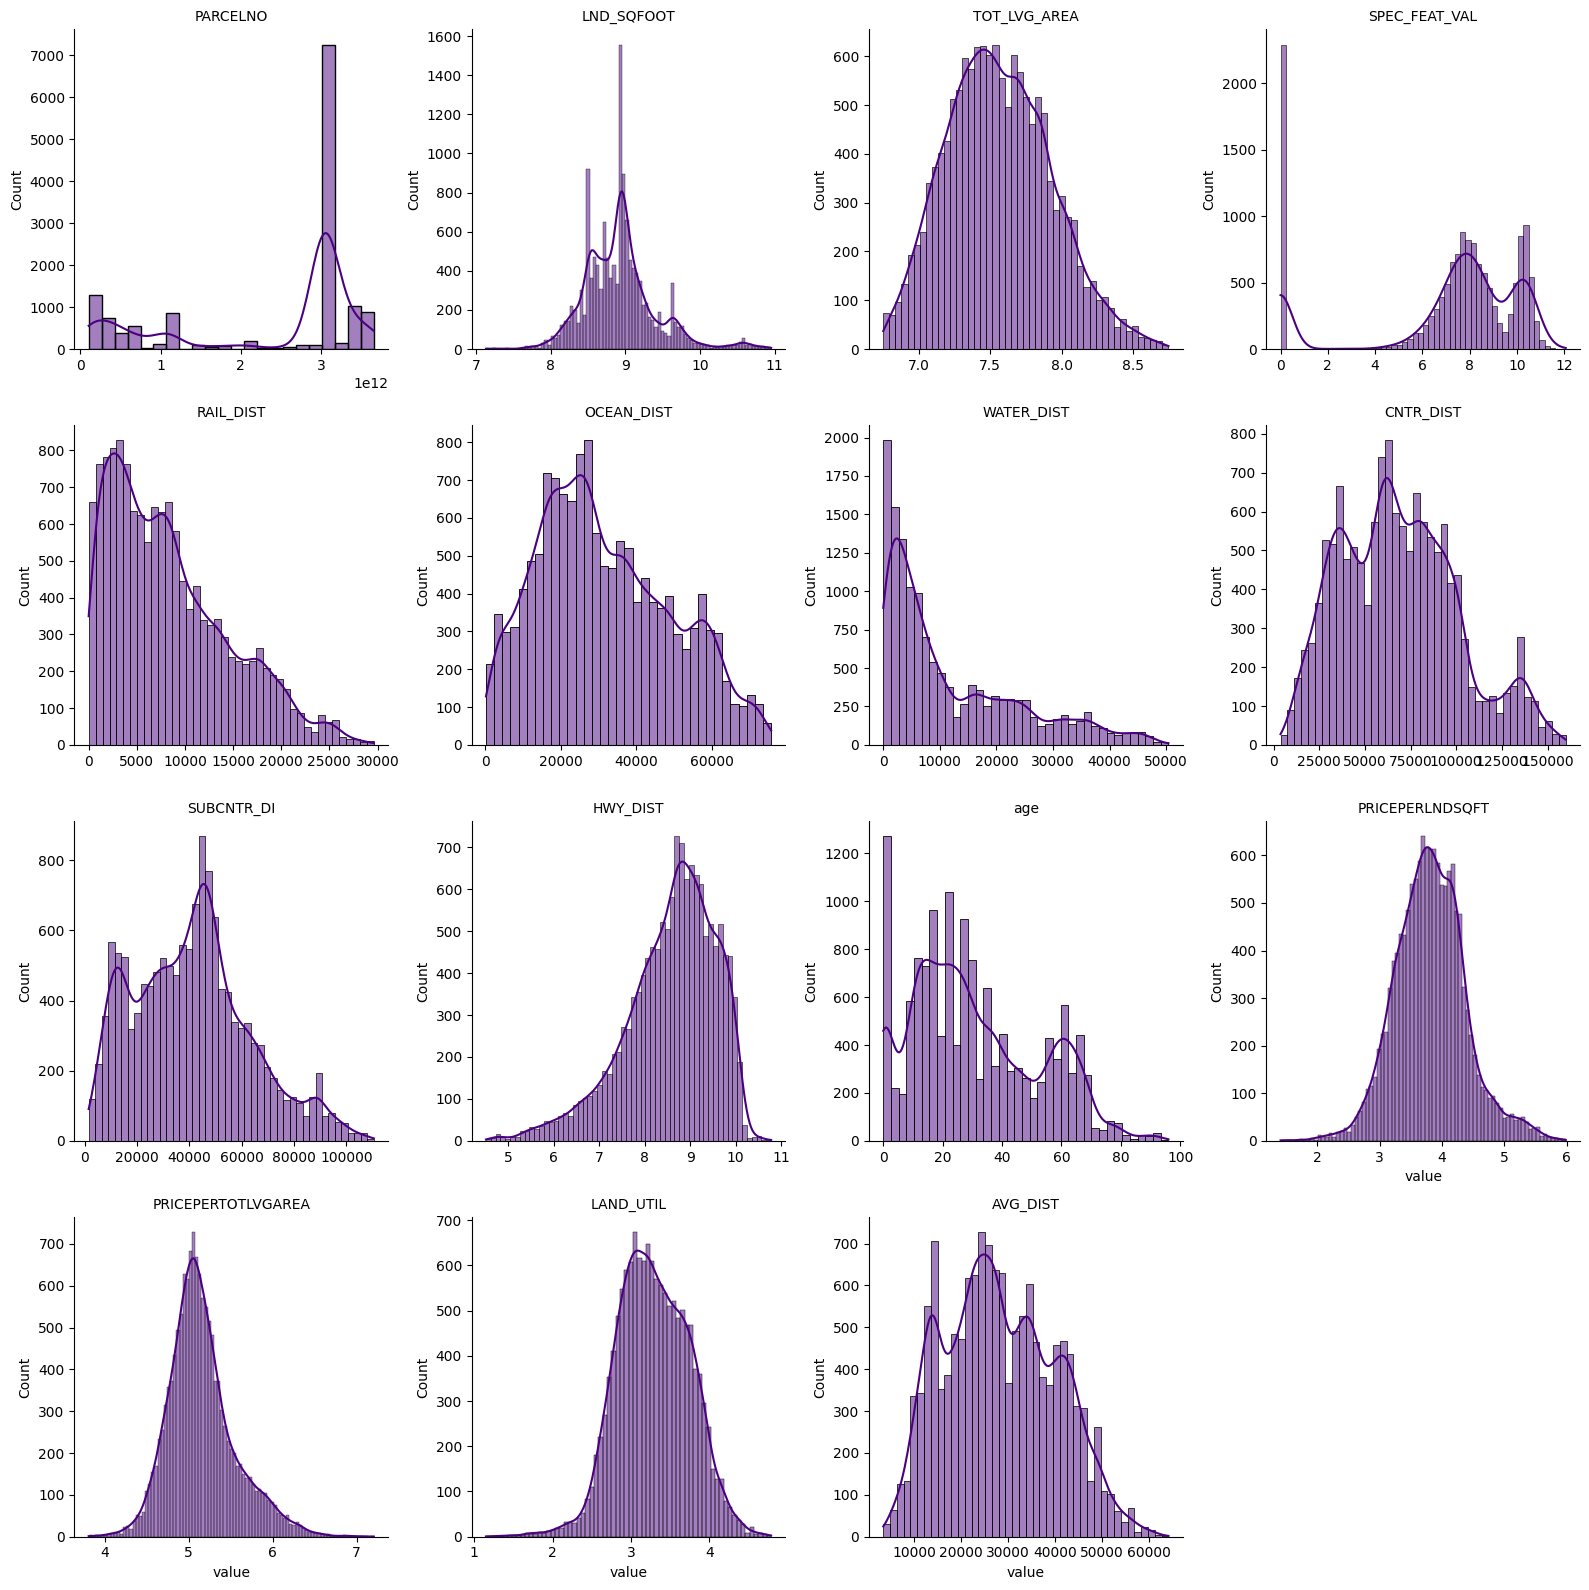

In [239]:
# Recheck for Skew on new Variables
df_melt = df.drop(columns=['SALE_PRC','LATITUDE','LONGITUDE','WALK_OCEAN','structure_quality','month_sold','avno60plus']).melt()
g = sns.FacetGrid(df_melt, col="variable", col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "value", color="indigo",kde=True,)
g.set_titles("{col_name}")
plt.show()

### Feature Selection

Text(0.5, 1.0, 'Correlation Heatmap of Data')

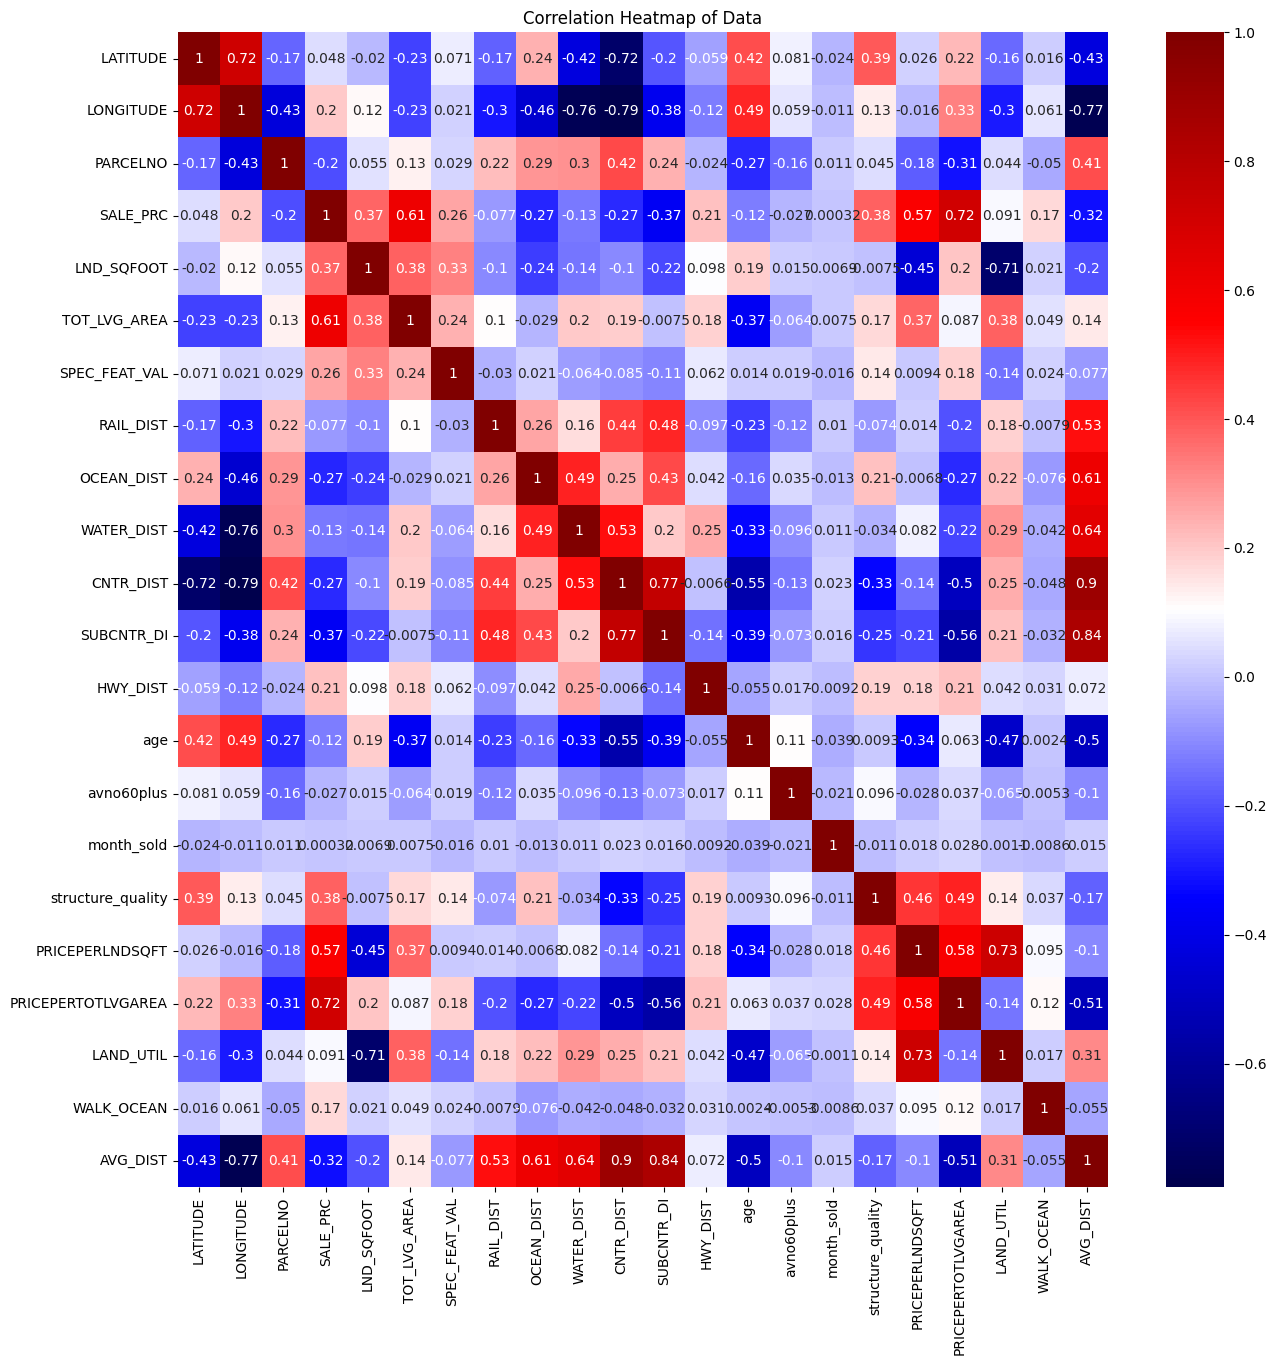

In [240]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='seismic')
plt.title('Correlation Heatmap of Data')

Text(0.5, 1.0, 'Correlation to cases_new Variable')

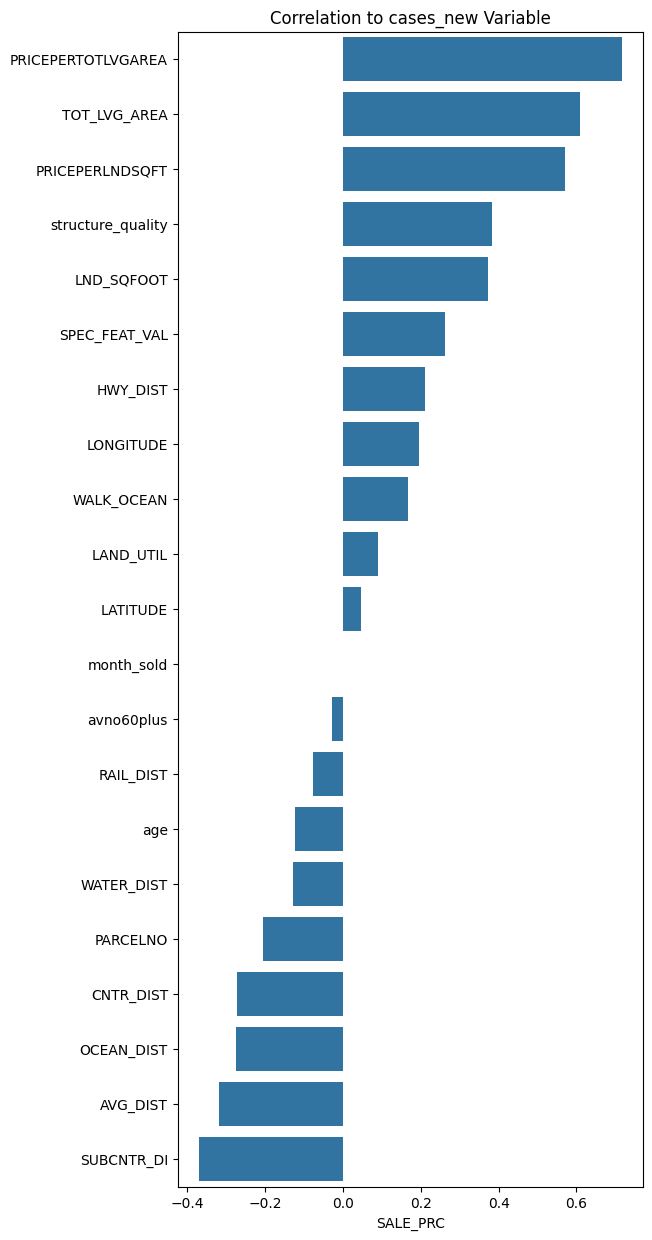

In [241]:
plt.figure(figsize=(6,15))
sns.barplot(df.corr()['SALE_PRC'].drop('SALE_PRC').sort_values(ascending=False),orient = 'h')
plt.title('Correlation to cases_new Variable')


In [242]:
col_to_drop = []
for col, v in df.corr()['SALE_PRC'].items():
    if -0.2 < v < 0.2:
        col_to_drop.append(col)
        print(col)


LATITUDE
LONGITUDE
RAIL_DIST
WATER_DIST
age
avno60plus
month_sold
LAND_UTIL
WALK_OCEAN


In [243]:
df.drop(columns=col_to_drop,inplace=True)

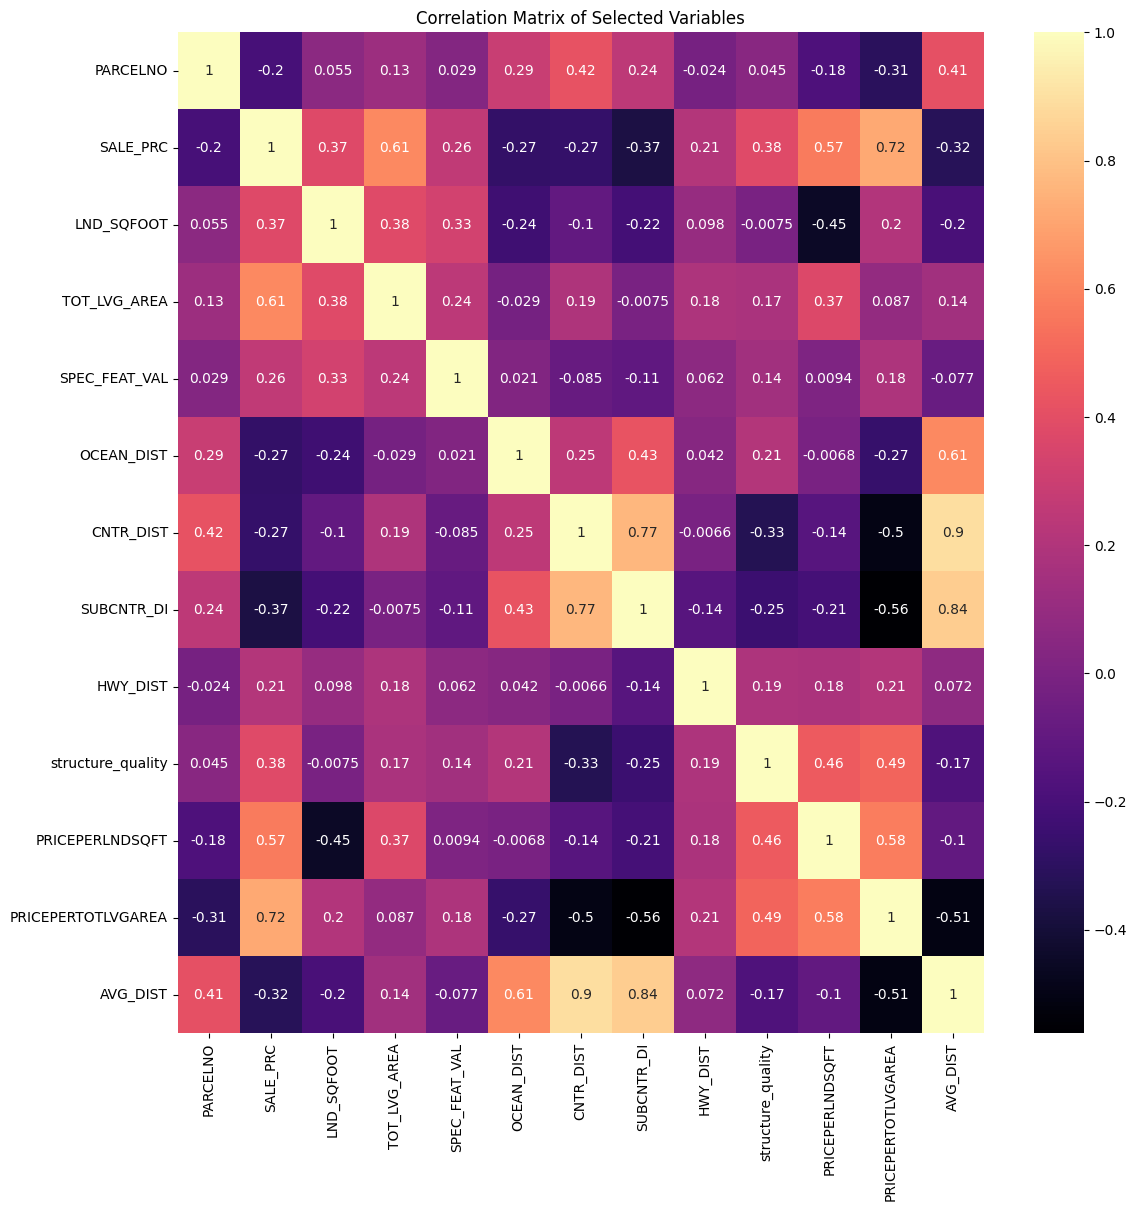

In [244]:
plt.figure(figsize=(13,13))
plt.title('Correlation Matrix of Selected Variables')
sns.heatmap(df.corr(),annot=True,cmap='magma')
plt.show()

## Modelling

### Cross-Validation

In [245]:
X = df.drop('SALE_PRC',axis=1)
X.head(3)

PARCELNO  LND_SQFOOT  TOT_LVG_AREA  SPEC_FEAT_VAL  OCEAN_DIST  \
0  6.222801e+11    9.145909      7.469654       0.000000     12811.4   
1  6.222801e+11    9.145909      7.447751       0.000000     10648.4   
2  6.222801e+11    9.145909      7.730614      10.803791     10574.1   

   CNTR_DIST  SUBCNTR_DI  HWY_DIST  structure_quality  PRICEPERLNDSQFT  \
0    42815.3     37742.2  9.677584                  4         3.869811   
1    43504.9     37340.5  9.805103                  4         3.643533   
2    43530.4     37328.7  9.809259                  4         4.458216   

   PRICEPERTOTLVGAREA      AVG_DIST  
0            5.529422  18747.883333  
1            5.320561  19052.616667  
2            5.865033  19057.283333

In [246]:
y = df['SALE_PRC']
y.head(3)

0    440000.0
1    349000.0
2    800000.0
Name: SALE_PRC, dtype: float64

In [247]:
from sklearn.pipeline import Pipeline

reg_pipe = Pipeline([
    ('scaler', StandardScaler())
])

In [248]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X,y,shuffle=True,random_state=42,test_size=0.25)
print(f'X shape: {X_train.shape},{X_test.shape}')
print(f'y shape: {y_train.shape},{y_test.shape}')

X shape: (10449, 12),(3483, 12)
y shape: (10449,),(3483,)


In [249]:
X_train_scaled = reg_pipe.fit_transform(X_train)
X_test_scaled = reg_pipe.transform(X_test)

y_train_scaled = reg_pipe.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = reg_pipe.transform(y_test.values.reshape(-1,1))

### Model Training

#### Linear Regression

In [250]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [251]:
lr.coef_

array([[-0.02532882,  7.74115362, -5.3081181 ,  0.01180611, -0.1371343 ,
        -0.19364085,  0.10175471, -0.0255801 , -0.03257277,  9.36282615,
        -5.79449623,  0.10782159]])

In [252]:
y_pred = lr.predict(X_test_scaled)

C:\Users\Marcus Ong\AppData\Local\Temp\ipykernel_19864\4098277709.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


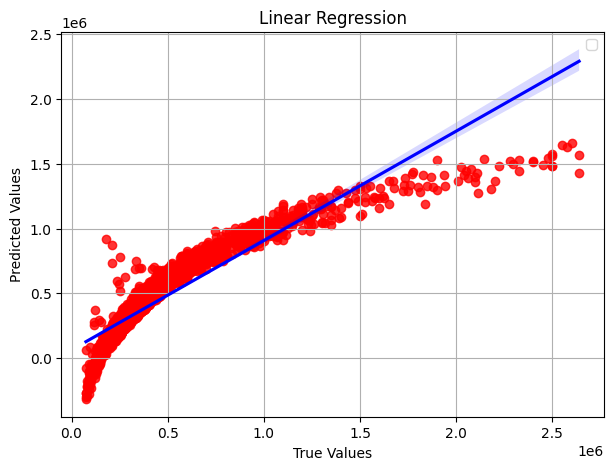

In [253]:
plt.figure(figsize=(7,5))
plt.grid()
sns.regplot(x=reg_pipe.inverse_transform(y_test_scaled), y=reg_pipe.inverse_transform(y_pred),scatter_kws={'color': 'r'},
            line_kws={'color': 'b'})
plt.legend()
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')
plt.show()

In [254]:
print('Feature Coeffcients')
for column, coef in zip(X.columns, lr.coef_[0]):
    print(f'{column:<20} : {coef:.5f}')

print(f'Intercept : {lr.intercept_[0]:.15f}')

Feature Coeffcients
PARCELNO             : -0.02533
LND_SQFOOT           : 7.74115
TOT_LVG_AREA         : -5.30812
SPEC_FEAT_VAL        : 0.01181
OCEAN_DIST           : -0.13713
CNTR_DIST            : -0.19364
SUBCNTR_DI           : 0.10175
HWY_DIST             : -0.02558
structure_quality    : -0.03257
PRICEPERLNDSQFT      : 9.36283
PRICEPERTOTLVGAREA   : -5.79450
AVG_DIST             : 0.10782
Intercept : -0.000000000000002


In [255]:
print("Intercept")
print(f"{lr.intercept_}")

Intercept
[-2.22748906e-15]


- Scikit-Learn's LinearRegression Function uses OLS + MSE. Ordinary Least Squares and RMSE to determine coefficients and intercept, $$\hat{\beta} = (X^TX)^{-1}X^Ty$$ 
- where :
- X is the matrix of input features (including a column of ones for the intercept).
- 𝑦 is the vector of observed outputs.
- β is the vector of estimated coefficients.

In [256]:
import statsmodels.api as sm
X_train_scaled_ols = sm.add_constant(X_train_scaled)
result = sm.OLS(y_train_scaled, X_train_scaled_ols).fit()
print(result.params[0])
print(result.params[1:])

8.285824766542843e-17
[-0.02532882  7.74115362 -5.3081181   0.01180611 -0.1371343  -0.19364085
  0.10175471 -0.0255801  -0.03257277  9.36282615 -5.79449623  0.10782159]


#### SGDRegressor

In [276]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(verbose=0)
sgdr.fit(X_train_scaled,y_train_scaled)

e:\Github Repositories\6005CEM-ML\.venv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [258]:
y_pred = sgdr.predict(X_test_scaled)

C:\Users\Marcus Ong\AppData\Local\Temp\ipykernel_19864\2046956201.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


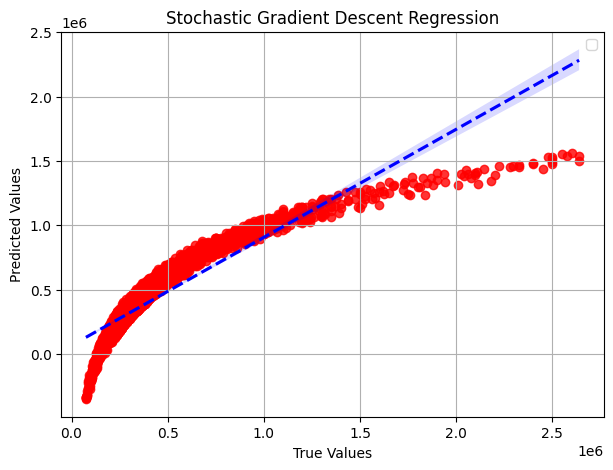

In [259]:
plt.figure(figsize=(7,5))
plt.grid()
sns.regplot(x=reg_pipe.inverse_transform(y_test_scaled.reshape(-1, 1)), y=reg_pipe.inverse_transform(y_pred.reshape(-1, 1)), scatter_kws={'color': 'r'},
            line_kws={'color': 'b','linestyle':"--"})
plt.legend()
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Stochastic Gradient Descent Regression')
plt.show()

#### DecisionTreeRegressor

In [260]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [261]:
y_pred = dtr.predict(X_test)

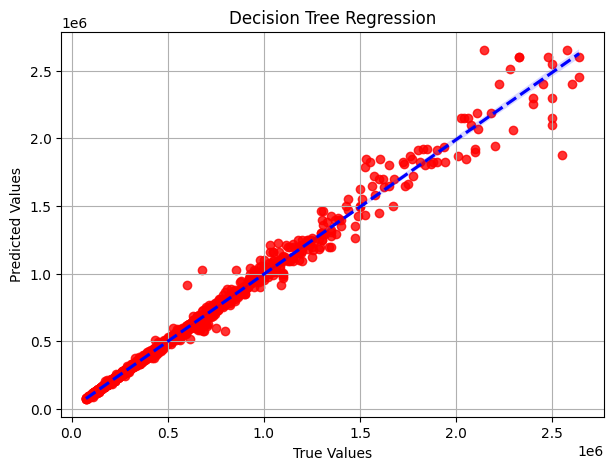

In [262]:
plt.figure(figsize=(7,5))
plt.grid()
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'r'},
            line_kws={'color': 'b','linestyle':"--"})
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression')
plt.show()

In [263]:
dtr.decision_path

<bound method BaseDecisionTree.decision_path of DecisionTreeRegressor()>

In [264]:
tree_decision_rules = tree.export_text(dtr, feature_names=list(X_train.columns))
print(tree_decision_rules)

|--- PRICEPERTOTLVGAREA <= 5.72
|   |--- TOT_LVG_AREA <= 7.95
|   |   |--- TOT_LVG_AREA <= 7.55
|   |   |   |--- PRICEPERTOTLVGAREA <= 5.07
|   |   |   |   |--- TOT_LVG_AREA <= 7.28
|   |   |   |   |   |--- PRICEPERTOTLVGAREA <= 4.74
|   |   |   |   |   |   |--- PRICEPERTOTLVGAREA <= 4.56
|   |   |   |   |   |   |   |--- TOT_LVG_AREA <= 7.15
|   |   |   |   |   |   |   |   |--- PRICEPERTOTLVGAREA <= 4.40
|   |   |   |   |   |   |   |   |   |--- TOT_LVG_AREA <= 6.99
|   |   |   |   |   |   |   |   |   |   |--- OCEAN_DIST <= 29670.60
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- OCEAN_DIST >  29670.60
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- TOT_LVG_AREA >  6.99
|   |   |   |   |   |   |   |   |   |   |--- PRICEPERTOTLVGAREA <= 4.25
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |

#### LightGBM

In [275]:
from lightgbm import LGBMRegressor
lgbmr = LGBMRegressor(verbose=0)
lgbmr.fit(X_train,y_train,eval_set=[(X_test, y_test), (X_train, y_train)])

LGBMRegressor(verbose=0)

In [266]:
y_pred = lgbmr.predict(X_test)

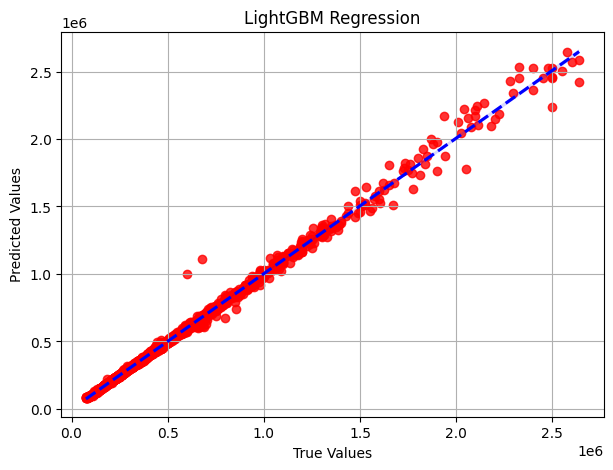

In [267]:
plt.figure(figsize=(7,5))
plt.grid()
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'r'},
            line_kws={'color': 'b','linestyle':"--"})
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('LightGBM Regression')
plt.show()

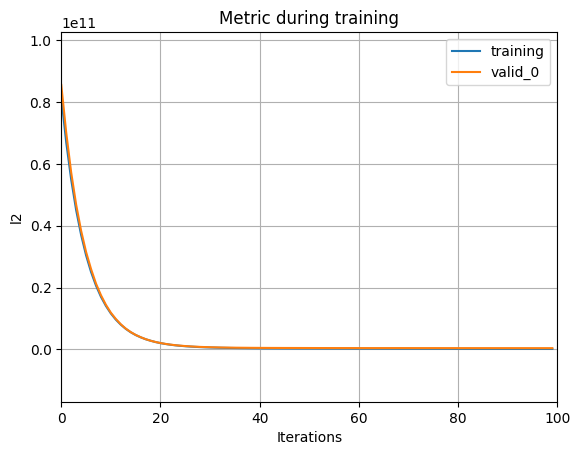

In [268]:
import lightgbm as lgb
lgb.plot_metric(lgbmr)
plt.show()

## Evaluation

#####  Formulas
- MAE - Mean Absolute Error $$\sum_{i=1}^{D}|x_i-y_i|$$
- MSE - Mean Square Error $$\sum_{i=1}^{D}(x_i-y_i)^2$$
- RMSE - Root Mean Square Error $$\sqrt{\sum_{i=1}^{D}(x_i-y_i)^2}$$
- R^2 - $$R^2 = 1 - \frac{\text{sum squared regression (SSR)}}{\text{total sum of squares (SST)}}, \\= 1 - \frac{\sum \left( y_i - \hat{y}_i \right)^2}{\sum \left( y_i - \bar{y} \right)^2}$$
- Adjusted R^2 - $$R^2_{\text{adj}} = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - p - 1} \right)$$

In [281]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error, r2_score,make_scorer


kf = KFold(n_splits=4, shuffle=True, random_state=42)
count = 1
for X_indexes , y_indexes in kf.split(X, y):
    print(f'Fold {count}, X : {len(X_indexes)}, y : {len(y_indexes)}')
    count += 1

Fold 1, X : 10449, y : 3483
Fold 2, X : 10449, y : 3483
Fold 3, X : 10449, y : 3483
Fold 4, X : 10449, y : 3483


In [282]:
def adj_r2_score(y_true,y_pred):
    r2 = r2_score(y_true,y_pred)
    n = 10449 # MANUALLY PUT
    p = X_train.shape[1]
    return 1 - (((1-r2)*(n-1))/(n-p-1)) 

In [317]:
def evaluate_scores(X,y,model,verbose=0,print=True):
    if print:
        print('Cross Validation for 4 Folds per Metric')

    scaler_X = StandardScaler()
    X = scaler_X.fit_transform(X)

    scaler_y = StandardScaler()
    y = scaler_y.fit_transform(y.values.reshape(-1,1))

    mse = cross_val_score(model,X,y,cv=kf,verbose=verbose,scoring="neg_mean_squared_error")
    rmse = cross_val_score(model,X,y,cv=kf,verbose=verbose,scoring="neg_root_mean_squared_error")
    mae = cross_val_score(model,X,y,cv=kf,verbose=verbose,scoring="neg_mean_absolute_error")
    r2 = cross_val_score(model,X,y,cv=kf,verbose=verbose,scoring="r2")
    adj_r2 = cross_val_score(model,X,y,cv=kf,verbose=verbose,scoring=make_scorer(adj_r2_score))

    if print:
        print('-'*10)
        print(f'Mean Squared Error : {np.mean(-mse):.4f}')
        print(f'Root Mean Squared Error : {np.mean(-rmse):.4f}')
        print(f'Mean Absolute Error : {np.mean(-mae):.4f}')
        print(f'R^2 :{ np.mean(r2):.4f}')
        print(f'Adjusted R^2 :{ np.mean(adj_r2):.4f}')
        print('-'*10)
        return None

    return type(model).__name__,np.mean(-mse),np.mean(-rmse),np.mean(-mae),np.mean(r2),np.mean(adj_r2)
    

In [318]:
def eval_overfit_check(model, X_train, y_train, X_test, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    print('Training Set Evaluation:')
    print(f'Mean Squared Error (Train): {mean_squared_error(y_train, train_pred)}')
    print(f'Mean Absolute Error (Train): {mean_absolute_error(y_train, train_pred)}')
    print(f'Root Mean Squared Error (Train): {np.sqrt(mean_squared_error(y_train, train_pred))}')
    print(f'R2 Score (Train): {r2_score(y_train, train_pred)}')

    print('\nTest Set Evaluation:')
    print(f'Mean Squared Error (Test): {mean_squared_error(y_test, test_pred)}')
    print(f'Mean Absolute Error (Test): {mean_absolute_error(y_test, test_pred)}')
    print(f'Root Mean Squared Error (Test): {np.sqrt(mean_squared_error(y_test, test_pred))}')
    print(f'R2 Score (Test): {r2_score(y_test, test_pred)}')

In [290]:
df_metrics = pd.DataFrame(columns=['model','mse','rmse','mae','r2','adj_r2'])

In [319]:
df_metrics.loc[0] = evaluate_scores(X,y,lr,print=False)
df_metrics.loc[1] = evaluate_scores(X,y,sgdr,print=False)
df_metrics.loc[2] = evaluate_scores(X,y,dtr,print=False)
df_metrics.loc[3] = evaluate_scores(X,y,lgbmr,print=False)

In [320]:
df_metrics

model       mse      rmse       mae        r2    adj_r2
0       LinearRegression  0.152046  0.389666  0.236918  0.847951  0.847777
1           SGDRegressor  0.165659  0.405717  0.249501  0.834781  0.834225
2  DecisionTreeRegressor  0.009376  0.096457  0.032152  0.990564  0.990644
3          LGBMRegressor  0.005289  0.070841  0.022829  0.994817  0.994811

### Model Finetuning

- Linear Regression
- SGD Regressor
- DecisionTree
- LightGBM


In [274]:
from sklearn.pipeline import make_pipeline
linear_regression = make_pipeline(StandardScaler(),LinearRegression())
SGD_regression = make_pipeline(StandardScaler(),SGDRegressor())


models = [linear_regression,SGD_regression,Poly_regression]

NameError: name 'Poly_regression' is not defined

Fold 1, X : 10449, y : 3483
Fold 2, X : 10449, y : 3483
Fold 3, X : 10449, y : 3483
Fold 4, X : 10449, y : 3483


In [456]:
model_param_grid = {
    'LinearRegression': {
    },
    
    'SGDRegressor': {
        'alpha': [0.0001, 0.001, 0.01],       # Regularization strength
        'penalty': [None,'l1'], # Regularization type
        'learning_rate': ['constant','optimal','adaptive'],  # Learning rate schedule
        'eta0': [0.01, 0.1],           # Initial learning rate
        'max_iter': [1000, 2000,5000],              # Max number of iterations
        'tol': [1e-3, 1e-4]                   # Tolerance for stopping criteria
    },
    
    'LightGBM': {
        'num_leaves': [31, 50, 100],          # Controls complexity of model
        'learning_rate': [0.01, 0.05, 0.1],   # Learning rate for boosting
        'n_estimators': [100, 200, 500],      # Number of boosting rounds
        'min_child_samples': [20, 50, 100],   # Minimum data in one leaf node
        'reg_alpha': [0.0, 0.1, 0.5],         # L1 regularization
        'reg_lambda': [0.0, 0.1, 0.5]         # L2 regularization
    }
}

In [457]:
results['LightGBM'].best_params_

NameError: name 'results' is not defined

#### Formulas
- MAE - Mean Absolute Error $$\sum_{i=1}^{D}|x_i-y_i|$$
- MSE - Mean Square Error $$\sum_{i=1}^{D}(x_i-y_i)^2$$
- RMSE - Root Mean Square Error $$\sqrt{\sum_{i=1}^{D}(x_i-y_i)^2}$$
- R^2 - $$R^2 = 1 - \frac{\text{sum squared regression (SSR)}}{\text{total sum of squares (SST)}}, \\= 1 - \frac{\sum \left( y_i - \hat{y}_i \right)^2}{\sum \left( y_i - \bar{y} \right)^2}$$
- Adjusted R^2 - $$R^2_{\text{adj}} = 1 - \left( \frac{1 - R^2}{n - p - 1} \right)(n - 1)$$

In [49]:
def adj_r2_score(r2,n,p):
    return 1 - ((1-r2)/(n-p-1)) * (n-1)

In [130]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error, r2_score,make_scorer



In [51]:
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R2 Score: {r2:.4f}')
print(f'Adj R2 Score: {adj_r2:.4f}')

NameError: name 'rmse' is not defined

In [1]:
sns.regplot(x=y_test,y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

NameError: name 'sns' is not defined

In [57]:

gbm = LGBMRegressor()
gbm.fit(X_train,y_train)

ModuleNotFoundError: No module named 'lightgbm'

In [273]:
y_pred = gbm.predict(X_test)

rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
r2 =  r2_score(y_true=y_test,y_pred=y_pred)

In [274]:
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R2 Score: {r2:.4f}')

Root Mean Squared Error (RMSE): 22241.9952
Mean Absolute Error (MAE): 7307.6369
Mean Squared Error (MSE): 494706348.7794
R2 Score: 0.9949


<Axes: xlabel='SALE_PRC'>

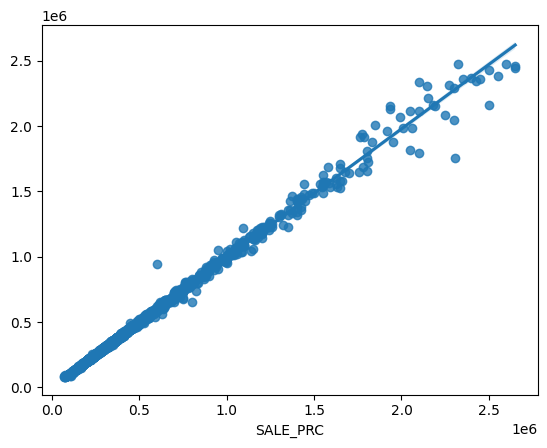

In [275]:
sns.regplot(x=y_test,y=y_pred)